## Object Detection using <font color = "Blue">YOLOV4</font>!

We'll be using **Scaled YoloV4** algorithm, for performing object-detection throught our webcam.

**YOLO** - **Y**ou **O**nly **L**ook **O**nce is one of the mostly used state of the art object detection algorithm which is premilinary being trained on COCO dataset. 

### Why it is named as such?

The detection happens through one single-pass, single forward pass which enables it be outperforming most of the already existing object detection algorithms. However, it's quite debatable in some sense, that in some of the scenarios, we see there are few which perform better. Thereby, we can fairly state that it depends on what scene we are working on, and based on our objective, we need to decide which algorithm we must implement and somehow make a good bargain out of it and quite experimental.

We'll be using the specific **YoloV4-csp-640X640** algorithm, which is considered as one of the fastest and the most accurate object detection existing till present.

We'll use the DarkNet implementation for our object detection process. We'll look into further details here.
___

So, let's get started!

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import cv2
import time
import io
import html

from IPython.display import display, Image, Javascript

from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode

%matplotlib inline

print('...')

...


### Setting up DarkNet for YOLOv4

For setting up, we must clone the repository from where we are going to fetch the DarkNet. In order to fetch the same, we are going to clone the **AlexeyAB**'s darknet repository to perform YOLO object detection.

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
print('...')

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.04 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (10359/10359), done.
...


After this, since we will be using the GPU and few others, we must set the variables **from 0 to 1** inorder to make sure that we are able to access that and allow it to process accordingly.

This can be done by alter the **Makefile**, which can be see in the **darknet** directory.

In [ ]:
# to enter the darknet folder
# %cd /content/darknet
%cd darknet

# to set the makefile vars(GPU, CUDDN, OCUDDN_HALF, OPENCV, LIBSO) to 1 to activate
# sed is a powerful text stream which allows to perform various text manipulation tasks
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile # LIBSO is the key to allow the access to DarkNet
print('...')

/content/darknet
...


We'll now **make darknet** inorder to use darknet.py for our implementation


**!make**, builds the darknet and sets it's dependencies right, for us to be able to perform our object detection.

In [ ]:
# Building the darknet
!make
print('...')

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

### Fetch the **pre-trained** weights
___

There we are going to get the pre-trained weights file for the scaled YOLOv4, which was actually being trained on COCO dataset having 80 different classes. Therefore, our YOLOv4 algorithm is able to capture **80** different classes in real from the shared drive.

Let's see the command below for better understanding.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.**confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt
print('...')

--2022-03-12 08:19:39--  https://docs.google.com/uc?export=download&confirm=t&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq
Resolving docs.google.com (docs.google.com)... 142.250.1.102, 142.250.1.139, 142.250.1.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.1.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h0rs54tdjbmej1v2hg8eogdfhi54actp/1647073125000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download [following]
--2022-03-12 08:19:39--  https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h0rs54tdjbmej1v2hg8eogdfhi54actp/1647073125000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download
Resolving doc-14-84-docs.googleusercontent.com (doc-14-84-docs.googleusercontent.com)... 142.251.6.132, 2607:f8b0:4001:c5a::84
Connecting to doc-14-84-docs.googleusercontent.com (doc-14-84-docs

## **DarkNet** for python

For us to utilize YOLOv4 with python, we'll use some of the pre-uilt functions that are already available in darknet.py file. For more explorations, we can go through the file for more experimentation.

We'll see further implementation here below.

In [ ]:
pwd

'/content/darknet'

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# %cd /content/darknet/

# Importing DarkNet functions to be able perform alterations
from darknet import *

# Load in our YOLOv4 architecture network
# load_network takes in config_file(path), data_file(path), weights(path)

config_path = "/content/darknet/cfg/yolov4-csp.cfg"
data_path = "/content/darknet/cfg/coco.data"
weights_path = "/content/darknet/yolov4-csp.weights"

network, class_names, class_colors = load_network(config_path, data_path, weights_path)

# Fetching width and height
width, height = network_width(network), network_height(network)

# DarkNet Helper function
## DarkNet helper function allows us to perfom detection on image
def darknet_helper(image, width, height):
  
  ## Getting the image
  darknet_img = make_image(width, height, 3)

  ## Converting from BGR to RGB format
  rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  ## Resizing the converted image to the required dimension
  resized_img = cv2.resize(rgb_img, (width, height), interpolation = cv2.INTER_LINEAR)

  ## Get image ratios to convert the bounding boxes to apporpriate size
  img_height, img_width, _ = image.shape

  ## Getting height 
  height_ratio = img_height / height
  width_ratio = img_width / width

  ## Running model on darknet styled image to get detection
  copy_image_from_bytes(darknet_img, resized_img.tobytes())
  img_detections = detect_image(network, class_names, darknet_img)
  free_image(darknet_img)

  return img_detections, width_ratio, height_ratio

### YOLOv4 example on **Test** image

Let's make sure our model has been successfully loaded and make proper detections on the test image. 

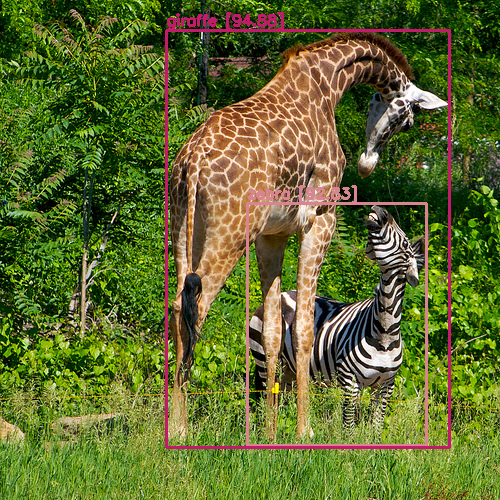

...


In [ ]:
image_c = cv2.imread("/content/darknet/data/giraffe.jpg")

img_detections, width_ratio, height_ratio = darknet_helper(image_c, height, width)


for label, confidence, bboxes in img_detections:
  left, top, right, bottom = bbox2points(bboxes)
  left, top, right, bottom = int(left*width_ratio), int(top*height_ratio), int(right*width_ratio), int(bottom*height_ratio)
  cv2.rectangle(image_c, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image_c, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image_c)

print('...')

### Few of the **Helper Functions**
Below provided are some helper functions that'll easily allow us to convert different types of images for further steps.


In [ ]:
# Function to convert a javascript object into an OpenCV image
def js_to_image(js_reply):
  """
    Parameters:
      js_reply: Javascript object containing the image from webcam
    Returns:
      img_final: OpenCV BGR image
  """

  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1]) ## To get the decoded format for image bytes
  # print(image_bytes)

  # Converting the bytes into numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8) ## To get the array from the buffer-fashion format

  # Decoding numpy into OpenCV BGR image
  img_final = cv2.imdecode(jpg_as_np, flags=1) ## Decoding the image in for openCV format('BGR')

  return img_final


## Function to convert opencv bounding box(rectangle) into base64 byte string for it to be laid out on the video stream(overlaying the bounding box here)
def bbox_to_bytes(bbox_array):
  """
  Parameters:
    bbox_array: Numpy array(pixels) containing rectangle to overlay on the video
  
  Returns:
    bytes: base64 image byte string
  """

  # bbox_array = 0
  # Converting array into PIL image
  
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()

  # Format bbox into png for return
  bbox_PIL.save(iobuf, format='png')

  # Format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

### YOLOv4 on **webcam** images
___


It's quite challenging to work on webcams and use it in a cloud environment. So, we will using javascript framework to determine the webcam taken input and interface with Colab. 

* Since, colab is using cloud server and camera is connected to our machine and not the cloud server through which our gpu accelerated operation is taking place, we need to find a way to integrate them both.

* However, Google colab provide a straight forward solution for us to integrate them both. **Colab's code snippet is having varierty of code functions that help us achieve our target.**

* We will use code snippet for **Camera Capture** which runs on javascript code to utilize computer's webcam, and then it will passed for object detection processing using YOLOv4 algorithm.



In [ ]:
def take_photo(filename = 'photo.jpg', quality = 0.8):

  js = Javascript('''
        async function takePhoto(quality)
        {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video:'True'})

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream; //SrcObject ----> srcObject
          await video.play();

          // Resizing the frame height to fit the video
          google.colab.output.setIframeHeight(document.documentElement.ScrollHeight, true);

          // Waiting for the capture to be clicked
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop(); //; was missing
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
  ''')
  display(js);

  # Get photo data
  data = eval_js('takePhoto({})'.format(quality))

  # Fetch OpenCV format
  img = js_to_image(data)

  # Calling darknet helper function on webcam image
  detections, width_ratio, height_ratio = darknet_helper(img, width, height)

  # Loop through the object detection and drawing them on web cam image
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2)
    cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)
    
    cv2.imwrite(filename, img)
    
    return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


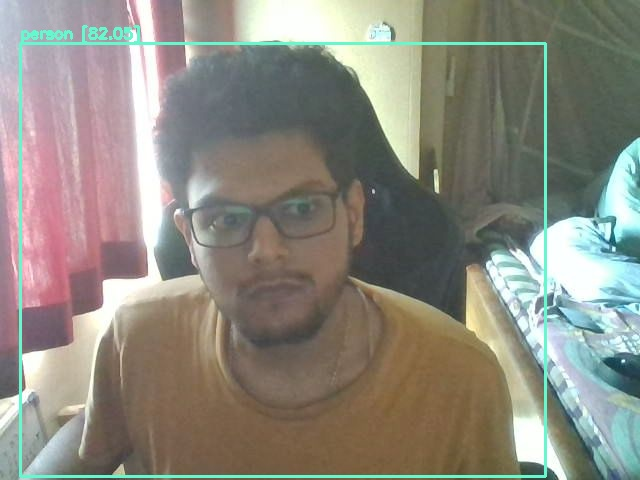

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

  

## Now, YOLOv4 on webcam
---
To perform object detection using YOLOv4 through webcam, we'll be using the same method, but we'll now pass each and every frame while true and process each frame through YOLOv4 object detection algorithm. YOLOv4 can perform real-time object detection.


In [ ]:
# We'll be using Javascript to properly create our live video using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom()
    {
      stream.getVideoTracks()[0].stop();
      video.remove();
      div.remove();
      video = null;
      div = null;
      stream = null;
      imgElement = null;
      captureCanvas = null;
      labelElement = null;
    }

    function onAnimationFrame()
    {
      if(!shutdown)
        window.requestAnimationFrame(onAnimationFrame);
      
      if(pendingResolve)
      {
        var result = "";
        if(!shutdown)
        {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.todataURL('image/jpeg', 0.8);
        }

        var lp = pindingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom()
    {
      if( div!=null)
        return stream;

        // creating element for div
        div = document.createElement('div');
        div.style.border = '2px solid black';
        div.style.padding = '3px';
        div.style.width = '100%';
        div.style.maxWidth = '600px';
        document.body.appendChild(div);

        const modelOut = document.createElement('div');
        modelOut.innerHTML = "<span>Status</span>";
        labelElement = document.createElement('span');
        labelElement.innerText = 'No data';
        labelElement.style.fontWeight = 'bold';
        modelOut.appendChild(labelElement);
        div.appendChild(modelOut);

        // creating element for video
        video = document.createElement('video');
        video.style.display = 'block';
        video.width = div.clientWidth - 6;
        video.setAttribute('playsinline', '');
        video.onclick = () => {shutdown = true; };
        stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
        div.appendChild(video);

        // creating element for image element
        imgElement = document.createElement('img');
        imgElement.style.position = 'absolute';
        imgElement.style.zindex = 1;
        imgElement.onclick = () => {shutdown = true;};
        div.appendChild(imgElement);

        const instruction = document.createElement('div');
        instruction.innerHTML = 
        '<span style="color: red; font-weight: bold;">' +
        'When finished, click here or on the video to stop this demo</span>';
        div.appendChild(instruction);
        instruction.onClick = () => { shutdown = true; };

        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.height = 480;
        captureCanvas.width = 640;
        window.requestAnimationFrame(onAnimationFrame);

        return stream;
    }

    async function stream_frame(label, imgData)
    {
      if(shutdown)
      {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate= Date.now();
      stream = await createDom();

      var preShow = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if(label!= "")
        labelElement.innerHTML = label;

      if(imgData!="")
      {
        var videoRect = video.getClientRects()[0];
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject)
      {
        pendingResolve = resolve;
      });
      shutdown = false;

      return{'create' : preShow - preCreate,
      'show' : preCapture - preShow,
      'capture': Date.now() - preCapture,
      'img': result};
    }
  ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
  # JavaScript to properly create our live video stream using our webcam as input
def video_stream():
    js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom()
    {
      stream.getVideoTracks()[0].stop();
      video.remove();
      div.remove();
      video = null;
      div = null;
      stream = null;
      imgElement = null;
      captureCanvas = null;
      labelElement = null;
    }

    function onAnimationFrame()
    {
      if(!shutdown)
        window.requestAnimationFrame(onAnimationFrame);
      
      if(pendingResolve)
      {
        var result = "";
        if(!shutdown)
        {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8);
        }

        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom()
    {
      if( div!=null)
        return stream;

        // creating element for div
        div = document.createElement('div');
        div.style.border = '2px solid black';
        div.style.padding = '3px';
        div.style.width = '100%';
        div.style.maxWidth = '600px';
        document.body.appendChild(div);

        const modelOut = document.createElement('div');
        modelOut.innerHTML = "<span>Status</span>";
        labelElement = document.createElement('span');
        labelElement.innerText = 'No data';
        labelElement.style.fontWeight = 'bold';
        modelOut.appendChild(labelElement);
        div.appendChild(modelOut);

        // creating element for video
        video = document.createElement('video');
        video.style.display = 'block';
        video.width = div.clientWidth - 6;
        video.setAttribute('playsinline', '');
        video.onclick = () => {shutdown = true; };
        stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
        div.appendChild(video);

        // creating element for image element
        imgElement = document.createElement('img');
        imgElement.style.position = 'absolute';
        imgElement.style.zindex = 1;
        imgElement.onclick = () => {shutdown = true;};
        div.appendChild(imgElement);

        const instruction = document.createElement('div');
        instruction.innerHTML = 
        '<span style="color: red; font-weight: bold;">' +
        'When finished, click here or on the video to stop this demo</span>';
        div.appendChild(instruction);
        instruction.onClick = () => { shutdown = true; };

        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.height = 480;
        captureCanvas.width = 640;
        window.requestAnimationFrame(onAnimationFrame);

        return stream;
    }

    async function stream_frame(label, imgData)
    {
      if(shutdown)
      {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate= Date.now();
      stream = await createDom();

      var preShow = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if(label!= "")
        labelElement.innerHTML = label;

      if(imgData!="")
      {
        var videoRect = video.getClientRects()[0];
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject)
      {
        pendingResolve = resolve;
      });
      shutdown = false;

      return{'create' : preShow - preCreate,
      'show' : preCapture - preShow,
      'capture': Date.now() - preCapture,
      'img': result};
    }
    ''')
    display(js)

def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data

## Running on webcam video

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>